In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Chargement de datasets

In [2]:
# Step 1: Load data from CSV files
clients_df = pd.read_csv('clients.csv', sep=';')
sales_df = pd.read_csv('ventes.csv')
product_df = pd.read_csv('produits_sous-categorie.csv')


In [3]:
clients_df.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
sales_df.head()

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [5]:
product_df.head()

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81


#### EDA for all DataFrames

In [6]:
# Describe for all DataFrames
display(clients_df.describe(include='all'))
display(sales_df.describe(include='all'))
display(product_df.describe(include='all'))

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_84,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1977.816769
std,NaN,NaN,46.071018
min,NaN,NaN,-2001.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


,id_prod,date,session_id,client_id,quantity_sold
count,337016,337016,337016,337016,337016.000000
unique,3266,336855,169195,8602,NaN
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609,NaN
freq,1081,13,200,12855,NaN
mean,NaN,NaN,NaN,NaN,5.498522
std,NaN,NaN,NaN,NaN,2.874598
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,8.000000


,product_id,category,sub_category,price,stock_quantity
count,3287,3287,3287,3287.000000,3287.000000
unique,3287,3,3,NaN,NaN
top,0_1920,Vêtements,T-shirts,NaN,NaN
freq,1,2309,2309,NaN,NaN
mean,NaN,NaN,NaN,21.856641,50.309705
std,NaN,NaN,NaN,29.847908,28.847379
min,NaN,NaN,NaN,-1.000000,1.000000
25%,NaN,NaN,NaN,6.990000,25.000000
50%,NaN,NaN,NaN,13.060000,51.000000
75%,NaN,NaN,NaN,22.990000,76.000000


<span style="color: green;">**Conclusion**</span>: The distribution of sex in the Clients DataFrame shows a relatively balanced proportion between female and male clients.

<span style="color: blue;">**Next Step Suggestion**</span>: Analyze sales by gender to determine which group contributes more to purchases.


In [7]:
# Info for all DataFrames
display(clients_df.info())
display(sales_df.info())
display(product_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_prod        337016 non-null  object
 1   date           337016 non-null  object
 2   session_id     337016 non-null  object
 3   client_id      337016 non-null  object
 4   quantity_sold  337016 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB


None

<span style="color: green;">**Conclusion**</span> : The `info()` output for the three DataFrames shows that all columns have non-null values, meaning there are no missing data entries. The `clients_df` has 8,623 entries, `ventes_df` has 337,016 entries, and `produits_df` has 3,287 entries. The data types are consistent with the expected formats, making further analysis feasible without additional data type conversions.

<span style="color: blue;">**Next Step Suggestion**</span> : Since there are no missing values, proceed with further data analysis and visualization tasks without requiring imputation for missing values. Focus on the relationships between the different DataFrames to derive business insights.


In [8]:
# Check for missing values after conversion

invalid_dates = sales_df[~sales_df['date'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{6}')]
print("Rows with invalid date values:")
invalid_dates

Rows with invalid date values:


,id_prod,date,session_id,client_id,quantity_sold
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,3
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,9
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,3
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,2
...,...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,2
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,4
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1,4


In [9]:
sales_df['date'] = sales_df['date'].str.replace('test_', '', regex=False)

In [10]:
invalid_dates = sales_df[~sales_df['date'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{6}')]
print("Rows with invalid date values:")
invalid_dates

Rows with invalid date values:


,id_prod,date,session_id,client_id,quantity_sold


In [11]:
# Missing values for all DataFrames
display(clients_df.isnull().sum())
display(sales_df.isnull().sum())
display(product_df.isnull().sum())


client_id    0
sex          0
birth        0
dtype: int64

id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

Absence of missing values confirmed.

In [12]:
# Duplicate rows for all DataFrames
display("Clients DataFrame - Duplicate Rows:", clients_df.duplicated().sum())
display("Ventes DataFrame - Duplicate Rows:", sales_df.duplicated().sum())
display("Produits DataFrame - Duplicate Rows:", product_df.duplicated().sum())

'Clients DataFrame - Duplicate Rows:'

np.int64(0)

'Ventes DataFrame - Duplicate Rows:'

np.int64(18)

'Produits DataFrame - Duplicate Rows:'

np.int64(0)

<span style="color: green;">**Conclusion**</span> : The `clients_df` and `product_df` DataFrames have no duplicate rows, while the `sales_df` DataFrame contains 18 duplicate rows. 

<span style="color: blue;">**Next Step Suggestion**</span> :  Remove the duplicate rows from the `sales_df` to ensure data quality before proceeding with further analysis.


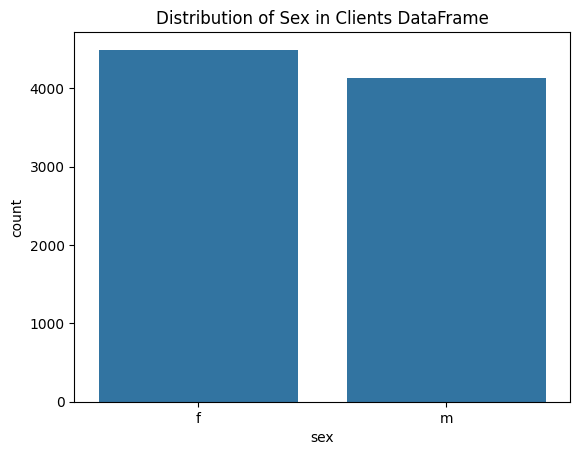

In [13]:
# Distribution of 'sex'
sns.countplot(x='sex', data=clients_df)
plt.title('Distribution of Sex in Clients DataFrame')
plt.show()


<span style="color: green;">**Conclusion**</span> : The distribution of sex in the Clients DataFrame shows a relatively balanced proportion between female and male clients.  
<span style="color: blue;">**Next Step Suggestion**</span> :  Analyze sales by gender to determine which group contributes more to purchases.

### Data Cleaning

In [14]:
# Clients DataFrame - Identify and remove clients with abnormal birth year
# Calculate age and identify anomalies
clients_df['age'] = 2024 - clients_df['birth']

In [15]:
# Identify clients with abnormal birth year (age less than 18 or greater than 100)
anomalous_clients = clients_df[(clients_df['age'] < 18) | (clients_df['age'] > 100)]
display("Number of clients with abnormal birth year:", len(anomalous_clients))
display("Details of clients with abnormal birth year:")
display(anomalous_clients)

'Number of clients with abnormal birth year:'

1

'Details of clients with abnormal birth year:'

,client_id,sex,birth,age
8494,ct_1,m,-2001,4025


In [16]:
# Remove clients with abnormal age
clients_df = clients_df[(clients_df['age'] >= 18) & (clients_df['age'] <= 100)]

In [17]:
# Clean Ventes DataFrame
# Remove duplicate rows
sales_df = sales_df.drop_duplicates()


In [18]:
# Clean Produits DataFrame
# Identify products with negative price
negative_price_products = product_df[product_df['price'] < 0]
display("Number of products with negative price:", len(negative_price_products))
display("Details of products with negative price:")
display(negative_price_products)

'Number of products with negative price:'

1

'Details of products with negative price:'

,product_id,category,sub_category,price,stock_quantity
731,T_0,Vêtements,T-shirts,-1.0,89


In [19]:
# Clean Produits DataFrame
# Replace price equal to -1 with the median price of the category
median_price = product_df[product_df['price'] > 0]['price'].median()
product_df.loc[product_df['price'] == -1, 'price'] = median_price

In [20]:
sales_df.to_csv('sales_ready.csv')
clients_df.to_csv('clients_ready.csv')
product_df.to_csv('product_ready.csv')

#### Anomaly Detections

In [21]:
from sklearn.ensemble import IsolationForest
import numpy as np
from scipy import stats

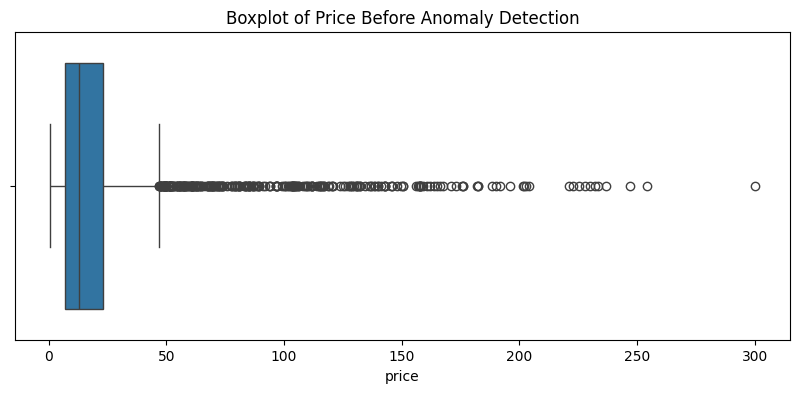

In [22]:
# Product DataFrame - Boxplot before anomaly detection
plt.figure(figsize=(10, 4))
sns.boxplot(data=product_df, x='price')
plt.title('Boxplot of Price Before Anomaly Detection')
plt.show()

In [23]:
# Isolation Forest for anomaly detection in 'price'
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
product_df['anomaly_if'] = isolation_forest.fit_predict(product_df[['price', 'stock_quantity']])

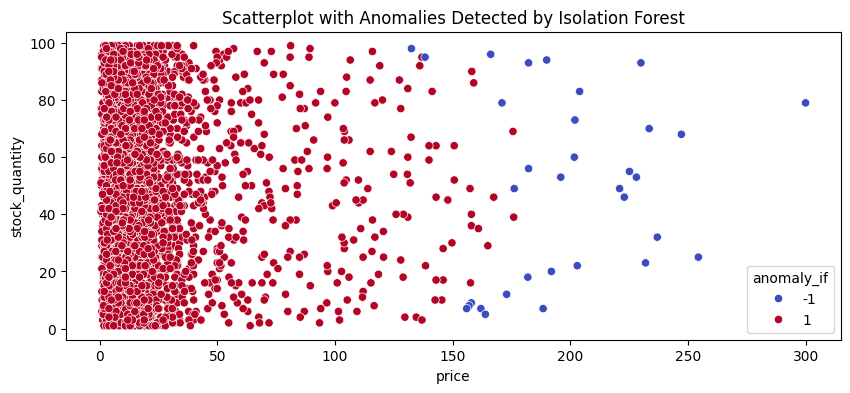

In [24]:
# Scatterplot with anomalies highlighted
plt.figure(figsize=(10, 4))
sns.scatterplot(data=product_df, x='price', y='stock_quantity', hue='anomaly_if', palette='coolwarm')
plt.title('Scatterplot with Anomalies Detected by Isolation Forest')
plt.show()

<span style="color: green;">**Conclusion**</span>: The initial boxplot of the `price` column shows a significant number of outliers. The Isolation Forest method highlighted these outliers, showing that many points are marked as anomalies. However, it is not advisable to remove these anomalies immediately without further investigation. A more detailed analysis, including consultation with business and sales experts, is necessary to determine if the identified outliers are truly erroneous or represent genuine business cases.

<span style="color: blue;">**Next Step Suggestion**</span>: Collaborate with the business team to review these anomalies. Understand whether the detected anomalies are within the expected range for certain product categories or if they indicate incorrect data entries.


In [25]:
# Z-score method for anomaly detection in 'price'
product_df['z_score'] = np.abs(stats.zscore(product_df['price']))
z_threshold = 3
anomalies_z = product_df[product_df['z_score'] > z_threshold]
display("Number of products with anomalies detected using Z-score:", len(anomalies_z))

'Number of products with anomalies detected using Z-score:'

97

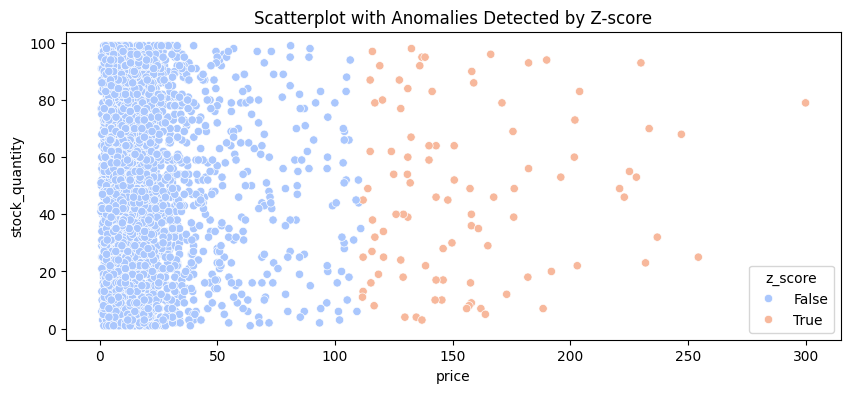

In [26]:
# Scatterplot with anomalies highlighted by Z-score
plt.figure(figsize=(10, 4))
sns.scatterplot(data=product_df, x='price', y='stock_quantity', hue=product_df['z_score'] > z_threshold, palette='coolwarm')
plt.title('Scatterplot with Anomalies Detected by Z-score')
plt.show()

<span style="color: green;">**Conclusion**</span> : The scatterplot shows that anomalies detected using the Z-score method (orange dots) represent products with significantly high or unusual price values. These points deviate from the mean price beyond the threshold Z = 3, indicating potential outliers.

<span style="color: blue;">**Next Steps Suggestion**</span> : Before deciding to remove these anomalies, it would be wise to conduct a detailed analysis and consult business and sales experts to understand if these anomalies are genuinely problematic or if they reflect valid business scenarios.

<span style="color: red;">**Differences Between Isolation Forest and Z-score Methods**</span> :  
- **Isolation Forest**: A machine learning approach that isolates anomalies based on how well data points fit into the general pattern. It works well with non-normal distributions and multivariate data.
- **Z-score**: A statistical method that identifies anomalies by measuring how many standard deviations a point is from the mean. It is useful when the data follows a normal distribution.

Although both methods detected similar anomalies in this instance, each has different criteria and assumptions, which may lead to identifying different sets of anomalies under various scenarios.


In [27]:
# IQR method for anomaly detection in 'price'
Q1 = product_df['price'].quantile(0.25)
Q3 = product_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
product_df['anomaly_iqr'] = (product_df['price'] < lower_bound) | (product_df['price'] > upper_bound)

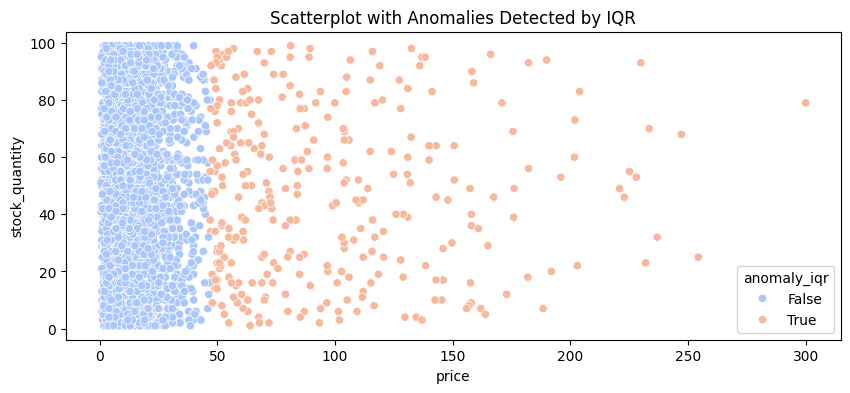

In [28]:
# Scatterplot with anomalies highlighted by IQR
plt.figure(figsize=(10, 4))
sns.scatterplot(data=product_df, x='price', y='stock_quantity', hue='anomaly_iqr', palette='coolwarm')
plt.title('Scatterplot with Anomalies Detected by IQR')
plt.show()

In [29]:
product_df.head()

,product_id,category,sub_category,price,stock_quantity,anomaly_if,z_score,anomaly_iqr
0,0_1421,Vêtements,T-shirts,19.99,39,1,0.062696,False
1,0_1368,Vêtements,T-shirts,5.13,76,1,0.560667,False
2,0_731,Vêtements,T-shirts,17.99,2,1,0.129718,False
3,1_587,Accessoires,Sacs à main,4.99,55,1,0.565359,False
4,0_1507,Vêtements,T-shirts,3.99,81,1,0.598870,False


<span style="color:green"><b>Conclusion:</b></span> The IQR method identified a significant number of anomalies based on price values outside the typical interquartile range, suggesting that many products have prices far above or below typical values.

<span style="color:blue"><b>Next Step Suggestion:</b></span> Before deciding to remove these anomalies, further analysis should be conducted to understand their context. Collaborate with domain experts in sales to determine whether the detected anomalies are true outliers or if there are justifiable business reasons behind them.


#### Advanced Analysis

In [30]:
# 1. Analysis of purchases by age group and gender
clients_df['age_group'] = pd.cut(clients_df['age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '61+'])
#merged_df = sales_df.merge(clients_df, on='client_id').merge(product_df, left_on='id_prod', right_on='product_id')
merged_df = sales_df.merge(clients_df, on='client_id').merge(product_df.drop(columns=['anomaly_if', 'z_score', 'anomaly_iqr']), left_on='id_prod', right_on='product_id')

In [31]:
merged_df.head()

,id_prod,date,session_id,client_id,quantity_sold,sex,birth,age,age_group,product_id,category,sub_category,price,stock_quantity
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,f,1977,47,46-60,0_1483,Vêtements,T-shirts,4.99,48
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,f,2000,24,18-30,2_226,Montres,Montres connectées,65.75,63
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,f,1979,45,31-45,1_374,Accessoires,Sacs à main,10.71,97
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,m,1963,61,61+,0_2186,Vêtements,T-shirts,4.20,57
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,f,1980,44,31-45,0_1351,Vêtements,T-shirts,8.99,59


C:\Users\daria\AppData\Local\Temp\ipykernel_22096\453790228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_purchases = merged_df.groupby(['age_group', 'sex'])['quantity_sold'].sum().reset_index()


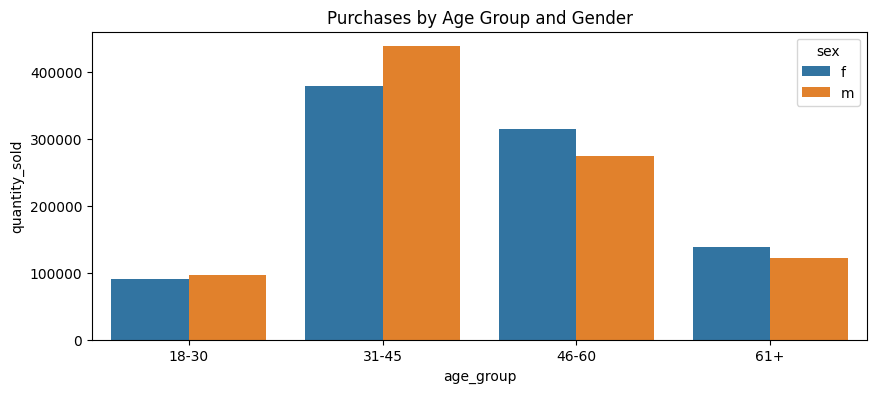

In [32]:
# Purchase analysis by age group and gender
age_gender_purchases = merged_df.groupby(['age_group', 'sex'])['quantity_sold'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=age_gender_purchases, x='age_group', y='quantity_sold', hue='sex')
plt.title('Purchases by Age Group and Gender')
plt.show()

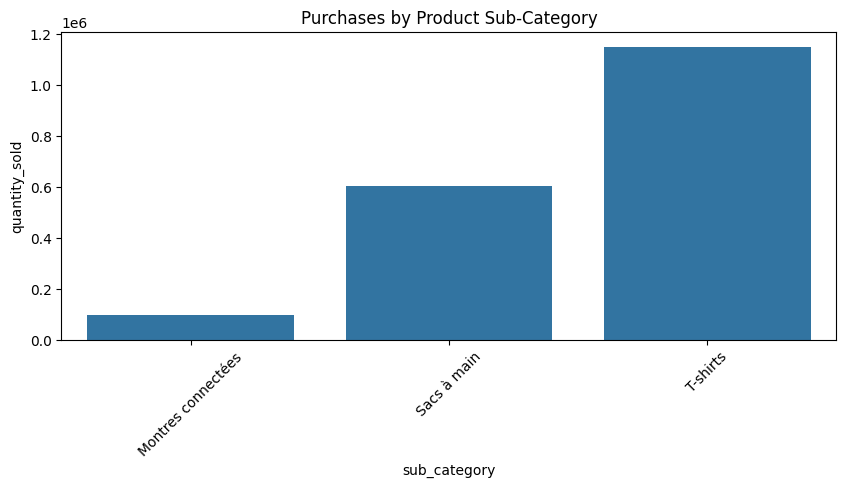

In [33]:
# Analysis of purchases by product sub-category
sub_category_purchases = merged_df.groupby('sub_category')['quantity_sold'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=sub_category_purchases, x='sub_category', y='quantity_sold')
plt.title('Purchases by Product Sub-Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\daria\AppData\Local\Temp\ipykernel_22096\2760719241.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subcat_purchases = merged_df.groupby(['age_group', 'sub_category'])['quantity_sold'].sum().reset_index()


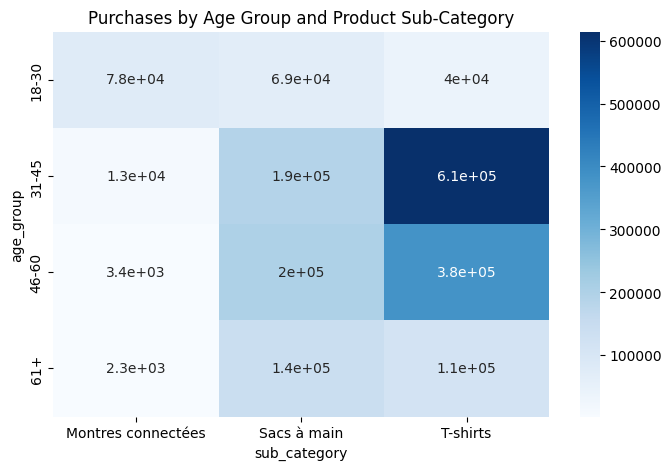

In [34]:
# Analysis of purchases by age group and product sub-category
age_subcat_purchases = merged_df.groupby(['age_group', 'sub_category'])['quantity_sold'].sum().reset_index()
plt.figure(figsize=(8, 5))
age_subcat_pivot = age_subcat_purchases.pivot(index='age_group', columns='sub_category', values='quantity_sold')
sns.heatmap(age_subcat_pivot, annot=True, cmap='Blues')
plt.title('Purchases by Age Group and Product Sub-Category')
plt.show()

C:\Users\daria\AppData\Local\Temp\ipykernel_22096\2337020353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subcat_grouped = merged_df.groupby(['age_group', 'sub_category'])['price'].sum().reset_index()


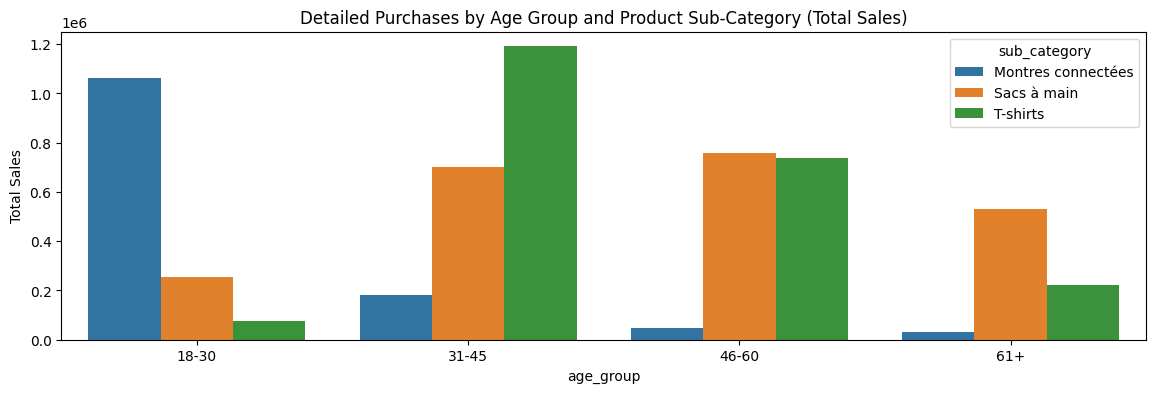

In [35]:
# Detailed Analysis of Product Sub-Categories by Age Group
age_subcat_grouped = merged_df.groupby(['age_group', 'sub_category'])['price'].sum().reset_index()
plt.figure(figsize=(14, 4))
sns.barplot(data=age_subcat_grouped, x='age_group', y='price', hue='sub_category')
plt.title('Detailed Purchases by Age Group and Product Sub-Category (Total Sales)')
plt.ylabel('Total Sales')
plt.show()

In [36]:
# Step 1: Convert the 'date' column to datetime format
# Convert date column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')


In [37]:
merged_df.head()

,id_prod,date,session_id,client_id,quantity_sold,sex,birth,age,age_group,product_id,category,sub_category,price,stock_quantity
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,f,1977,47,46-60,0_1483,Vêtements,T-shirts,4.99,48
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,f,2000,24,18-30,2_226,Montres,Montres connectées,65.75,63
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,f,1979,45,31-45,1_374,Accessoires,Sacs à main,10.71,97
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,m,1963,61,61+,0_2186,Vêtements,T-shirts,4.20,57
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,f,1980,44,31-45,0_1351,Vêtements,T-shirts,8.99,59


In [38]:
display(merged_df.isnull().sum())

id_prod           0
date              0
session_id        0
client_id         0
quantity_sold     0
sex               0
birth             0
age               0
age_group         0
product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

In [39]:
# Extract date components for further analysis
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month
merged_df['day'] = merged_df['date'].dt.day
merged_df['hour'] = merged_df['date'].dt.hour
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek

In [40]:
merged_df.head()

,id_prod,date,session_id,client_id,quantity_sold,sex,birth,age,age_group,product_id,category,sub_category,price,stock_quantity,year,month,day,hour,day_of_week
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,f,1977,47,46-60,0_1483,Vêtements,T-shirts,4.99,48,2021,4,10,18,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,f,2000,24,18-30,2_226,Montres,Montres connectées,65.75,63,2022,2,3,1,3
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,f,1979,45,31-45,1_374,Accessoires,Sacs à main,10.71,97,2021,9,23,15,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,m,1963,61,61+,0_2186,Vêtements,T-shirts,4.20,57,2021,10,17,3,6
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,f,1980,44,31-45,0_1351,Vêtements,T-shirts,8.99,59,2021,7,17,20,5


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336807 entries, 0 to 336806
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_prod         336807 non-null  object        
 1   date            336807 non-null  datetime64[ns]
 2   session_id      336807 non-null  object        
 3   client_id       336807 non-null  object        
 4   quantity_sold   336807 non-null  int64         
 5   sex             336807 non-null  object        
 6   birth           336807 non-null  int64         
 7   age             336807 non-null  int64         
 8   age_group       336807 non-null  category      
 9   product_id      336807 non-null  object        
 10  category        336807 non-null  object        
 11  sub_category    336807 non-null  object        
 12  price           336807 non-null  float64       
 13  stock_quantity  336807 non-null  int64         
 14  year            336807 non-null  int

In [42]:
# Add a new column for total sales amount
merged_df['total_sales'] = merged_df['quantity_sold'] * merged_df['price']
merged_df

,id_prod,date,session_id,client_id,quantity_sold,sex,birth,age,age_group,product_id,category,sub_category,price,stock_quantity,year,month,day,hour,day_of_week,total_sales
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,f,1977,47,46-60,0_1483,Vêtements,T-shirts,4.99,48,2021,4,10,18,5,24.95
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,f,2000,24,18-30,2_226,Montres,Montres connectées,65.75,63,2022,2,3,1,3,394.50
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,f,1979,45,31-45,1_374,Accessoires,Sacs à main,10.71,97,2021,9,23,15,3,32.13
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,m,1963,61,61+,0_2186,Vêtements,T-shirts,4.20,57,2021,10,17,3,6,33.60
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,f,1980,44,31-45,0_1351,Vêtements,T-shirts,8.99,59,2021,7,17,20,5,17.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336802,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1,m,1969,55,46-60,1_671,Accessoires,Sacs à main,31.99,13,2021,5,28,12,4,31.99
336803,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10,m,1991,33,31-45,0_759,Vêtements,T-shirts,22.99,65,2021,6,19,0,5,229.90
336804,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7,f,1968,56,46-60,0_1256,Vêtements,T-shirts,11.03,13,2021,3,16,17,1,77.21
336805,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8,f,1994,30,18-30,2_227,Montres,Montres connectées,50.99,94,2021,10,30,16,5,407.92


In [43]:
# Create a new column that combines year and month for plotting
merged_df['year_month'] = merged_df['year'].astype(int).astype(str) + '-' + merged_df['month'].astype(int).astype(str).str.zfill(2)

# Sort the data by year and month
merged_df = merged_df.sort_values(by=['year', 'month'])

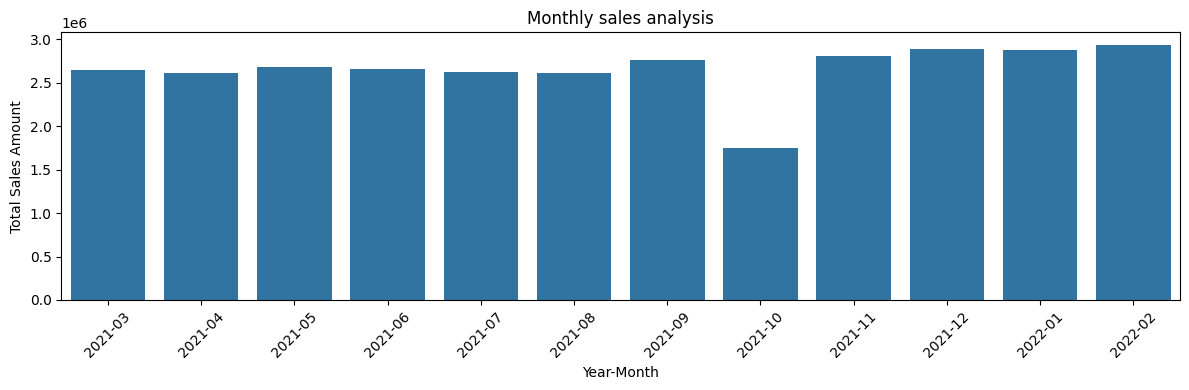

In [44]:
# Group data by year-month and calculate total sales
monthly_sales = merged_df.groupby('year_month')['total_sales'].sum().reset_index()

# Create a bar plot to visualize monthly sales trends with proper order
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_sales, x='year_month', y='total_sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly sales analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

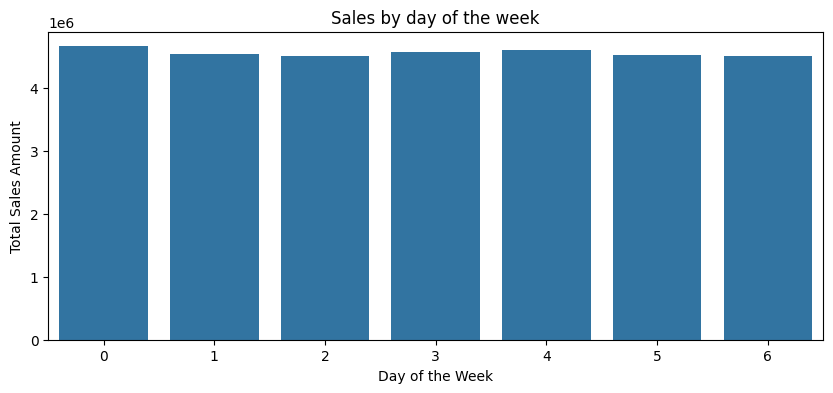

In [45]:
# Group data by day of the week to analyze sales patterns
weekly_sales = merged_df.groupby('day_of_week')['total_sales'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=weekly_sales, x='day_of_week', y='total_sales')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.title('Sales by day of the week')
plt.show()

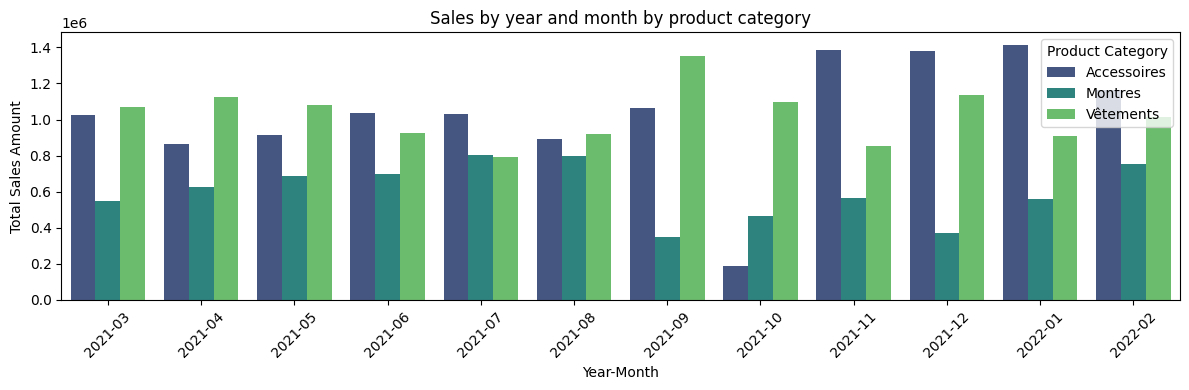

In [46]:
# Create a barplot for sales by year-month
plt.figure(figsize=(12, 4))
year_month_sales = merged_df.groupby(['year_month', 'category'])['total_sales'].sum().reset_index()
sns.barplot(data=year_month_sales, x='year_month', y='total_sales', hue='category', palette='viridis')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Sales by year and month by product category')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


In [47]:
# Calculate z-score for monthly total sales per product category to identify anomalies
monthly_sales = merged_df.groupby(['year', 'month', 'category'])['total_sales'].sum().reset_index()
monthly_sales['z_score'] = (monthly_sales['total_sales'] - monthly_sales['total_sales'].mean()) / monthly_sales['total_sales'].std()


In [48]:
# Filter data for October 2021 sales
october_sales = merged_df[(merged_df['year'] == 2021) & (merged_df['month'] == 10)]
daily_sales = october_sales.groupby(['day', 'category'])['total_sales'].sum().reset_index()


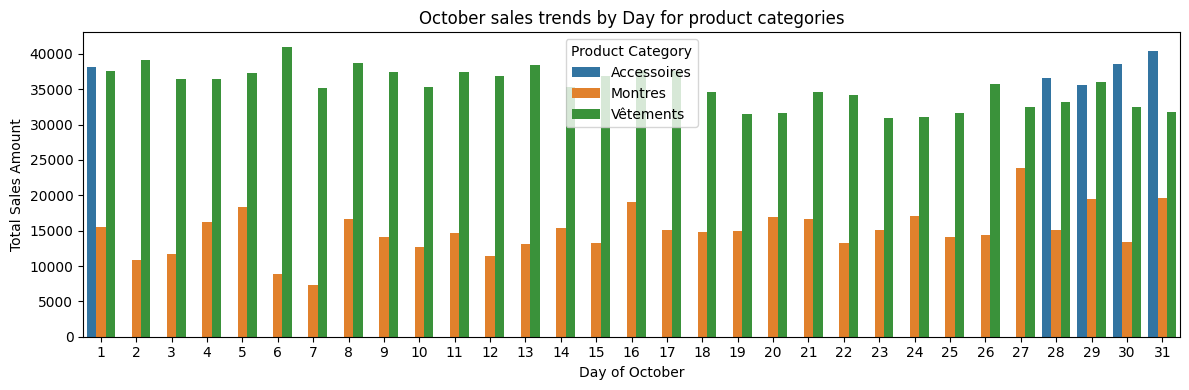

In [49]:
# Create a bar plot to visualize October sales trends by day for each product category
plt.figure(figsize=(12, 4))
sns.barplot(data=daily_sales, x='day', y='total_sales', hue='category')
plt.xlabel('Day of October')
plt.ylabel('Total Sales Amount')
plt.title('October sales trends by Day for product categories')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

<span style="color:green"><b>Conclusion:</b></span>Ce graph illustre une anomalie dans les ventes d'accessoires, où aucune vente n'a été enregistrée pendant plusieurs semaines en octobre. Pourquoi ces données sont-elles absentes, et quelles pourraient être les explications de cette absence ?  

* Erreur dans la collecte de données.
* Problème logistique ou rupture de stock.
* Dysfonctionnement du système de vente.
* Changement de stratégie marketing non documenté.
* Impact externe (par exemple, événements locaux).

In [50]:
# Filter data for October 2021 sales for Accessories
october_accessories_sales = october_sales[october_sales['category'] == 'Accessoires'].copy()
october_accessories_sales['z_score'] = (october_accessories_sales['total_sales'] - october_accessories_sales['total_sales'].mean()) / october_accessories_sales['total_sales'].std()

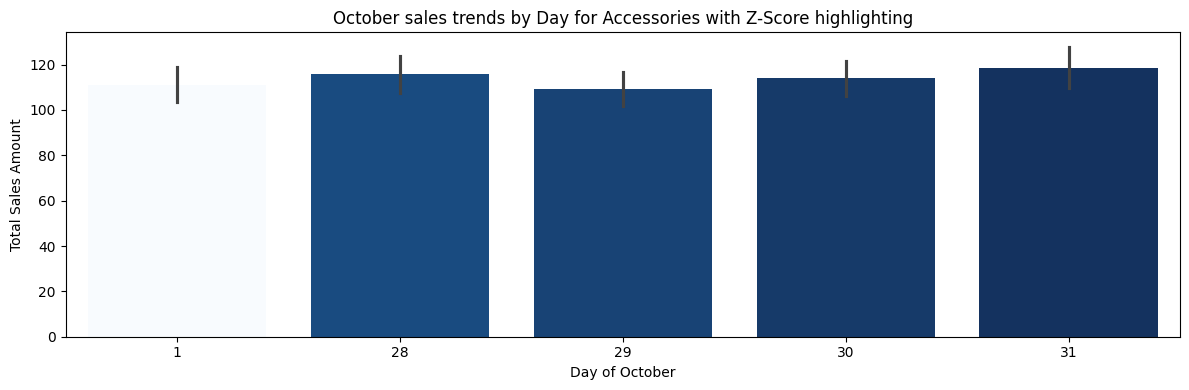

In [51]:
# Create a bar plot to visualize October sales trends by day for Accessories with z-score highlighting
plt.figure(figsize=(12, 4))
sns.barplot(data=october_accessories_sales, x='day', y='total_sales', hue='day', palette='Blues', dodge=False, legend=False)
plt.xlabel('Day of October')
plt.ylabel('Total Sales Amount')
plt.title('October sales trends by Day for Accessories with Z-Score highlighting')
plt.tight_layout()
plt.show()

<span style="color:green"><b>Conclusion:</b></span> The bar plot shows October sales trends by day specifically for the "Accessories" product category. The bars represent the total sales amount for each day in October, with the color highlighting based on the calculated z-score for each day. Days with different sales amounts stand out due to the varying intensities of the color, which indicates how far each day's sales deviate from the overall mean for October.

It appears from the plot that there is a significant decrease in sales during some days, such as October 1st. This can indicate either **missing data** for those specific days or **potential anomalies** in sales patterns that require further analysis. The shading variation (lighter or darker bars) is meant to highlight days that had unusually high or low sales compared to the average, based on their z-scores. The error bars on top of each bar also provide information about variability in sales.

In [52]:
# Filter data for Accessories sales
accessories_sales = merged_df[merged_df['category'] == 'Accessoires'].copy()
monthly_accessories_sales = accessories_sales.groupby(['year', 'month'])['total_sales'].sum().reset_index()
monthly_accessories_sales['z_score'] = (monthly_accessories_sales['total_sales'] - monthly_accessories_sales['total_sales'].mean()) / monthly_accessories_sales['total_sales'].std()

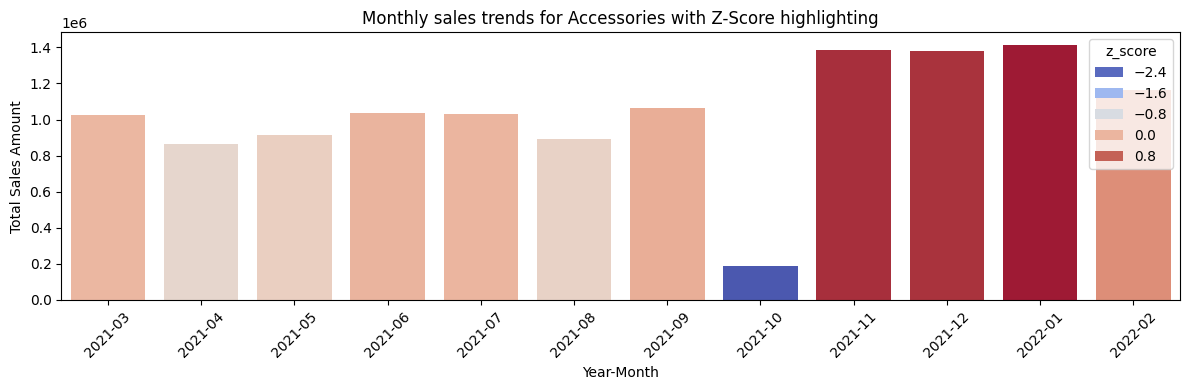

In [53]:
# Create a bar plot to visualize monthly sales trends for Accessories with z-score highlighting
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_accessories_sales, x=monthly_accessories_sales.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}", axis=1), y='total_sales', hue='z_score', palette='coolwarm', dodge=False, legend=True)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly sales trends for Accessories with Z-Score highlighting')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color:green"><b>Conclusion:</b></span>  
- **Méthode Z-score** :  Utilisée pour évaluer les tendances mensuelles des ventes d'accessoires.
- **Anomalies détectées** : Forte baisse en octobre 2021 (barre bleue).
- **Visualisation des anomalies** : Les couleurs plus foncées indiquent un écart plus important de la moyenne (Z-score élevé).
- **Interprétation** : Confirmation des périodes de vente très basses en octobre, suivi d'une hausse notable.

In [54]:
merged_df.to_csv('final_dataset.csv',index=False)